# <b>COVID-19 Visualization (2020)</b>

## How it all started -- Coronavirus Pandemic
<div class="image">
  <img style="float: top; margin:10px 0px 10px 0px; width:40%;" src="image_source/covid-19.jpg">
</div>
<style>
.image{
  text-align: center;
}
</style>

<p>COVID-19 coronavirus was firstly reported in China's Wuhan province in December 2019. The World Health Organization (WHO) declared the COVID-19 outbreak a pandemic on March 11, 2020. In the months since, there have been large outbreaks in Iran, South Korea, and Italy. </p>

<p>
This notebook will visualize the spread of COVID-19 across the globe, taking account to before social-distancing, quarantines lockdowns, and after.
</p>

<p>
Big thanks to organizations around the world, this notebook is only possible because the data collected by them. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a> to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.<em> Please note that the COVID-19 information and data are still constantly being updated. This project's data is obtained on March 17, 2020, therefore it should not be regarded the most up-to-date data available.</em>
</p>

In [1]:
# Import libraries required: 
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import dates

import sklearn
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Read "confirmed_cases_worldwide.csv" into confirmed_cases_worldwide
confirmed_cases_worldwide = pd.read_csv("datasets/confirmed_cases_worldwide.csv")

# View first 10 rows of result:
confirmed_cases_worldwide.head(10)

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [2]:
# Change confirmed_cases_worldwide date into pandas datetime:
confirmed_cases_worldwide.date = pd.to_datetime(confirmed_cases_worldwide.date)
confirmed_cases_worldwide.head()

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


## Visualization of confirm cases throughout the world
<p>The table above presents the total number of confirmed COVID-19 cases globally by date.<br>However, it is difficult to read and gain insight through table of numbers, so here is a line plot to visualize it.</p>

In [3]:
# Function for plotting line graph
def line_plot(mult_line, title_name, df, x, y):
    """ 
    Plots a line graph 
    :param mult_line: boolean to decide if plot is multiple line or single line
    :param title_name: title name of plot 
    :param df: data to plot 
    :param x: x-axis of plot
    :param y: y-axis of plot
    """

    # Set background and size of plot
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    plt.figure(figsize = (15, 8))

    # plot's title and (x,y) label
    plt.title(title_name)
    plt.xlabel(x)
    plt.ylabel(y)

    # Determine if plot is multiple line or single line
    if mult_line:
        ax = sns.lineplot(data=df)
    else:
        ax = sns.lineplot(data=df, x=x, y=y)
    # Space out x-axis (prevent messy x-axis)
    ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=1))
    plt.show()

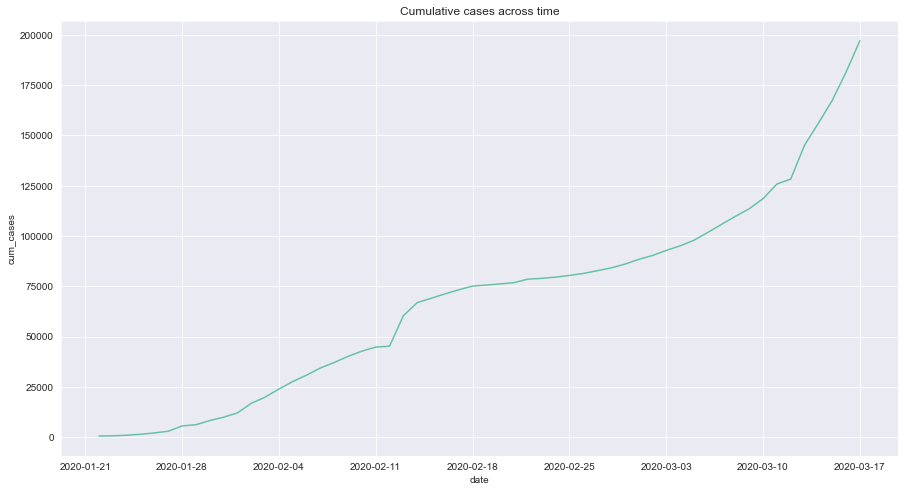

In [4]:
# Line plot of "Cumulative cases vs. date"
line_plot(False, "Cumulative cases across time", confirmed_cases_worldwide, "date", "cum_cases")

## Cases in China against the World
<p>With the total number of verified cases throughout the world reaching 200,000, the y-axis in that plot is rather frightening. Aside from that, strange things are happening: there's an unusual spike in mid-February, then the pace of new cases drops for a bit before picking up again in March. To figure out what's going on, we'll have to delve a little further.</p>
<p>COVID-19 cases were largely concentrated in China early in the pandemic. Let's visualize the trend between confirmed COVID-19 cases in China and the rest of the world to see if we can gain any insight.</p>

In [5]:
# Read in datasets/confirmed_cases_china_vs_world.csv
confirmed_cases_china_vs_world = pd.read_csv("datasets/confirmed_cases_china_vs_world.csv")
china_vs_world = confirmed_cases_china_vs_world.pivot("date", "is_china", "cum_cases")
china_vs_world.head()

is_china,China,Not China
date,,
2020-01-22,548,7
2020-01-23,643,10
2020-01-24,920,21
2020-01-25,1406,28
2020-01-26,2075,43


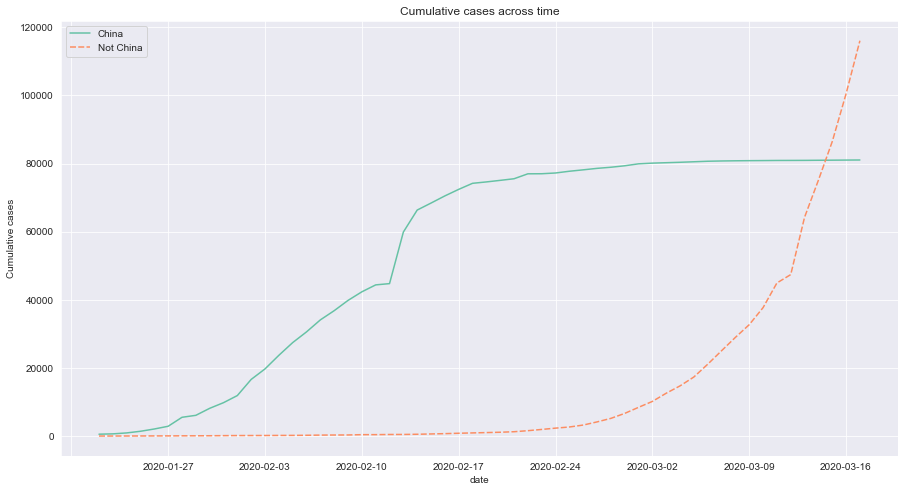

In [6]:
# Line plot of cumulative cases vs. date, (China & rest of the world)
line_plot(True, "Cumulative cases across time", china_vs_world, "Date", "Cumulative cases")

## Insights from China against the World
> - The plot above shows **2 different trend** where China first spikes then stay saturated whereas the world increases exponentially. 
> - The <em>majority of cases in February were in China<em>. That began to change in March, when the outbreak truly became worldwide: around March 14, the total number of cases outside China surpassed the number of cases within China. This was just days after the World Health Organization proclaimed a pandemic.
> - During the epidemic, there were a few of additional significant occurrences. For example, the massive rise in the China line on February 13, 2020 wasn't simply a horrible day for the epidemic; it was also a day when <em>China altered the method it reported statistics <em>(CT scans were accepted as evidence for COVID-19, rather than only lab tests).


### Annotate such events during the rise
> - Global health China report emergency declared change
> - Pandemic declared

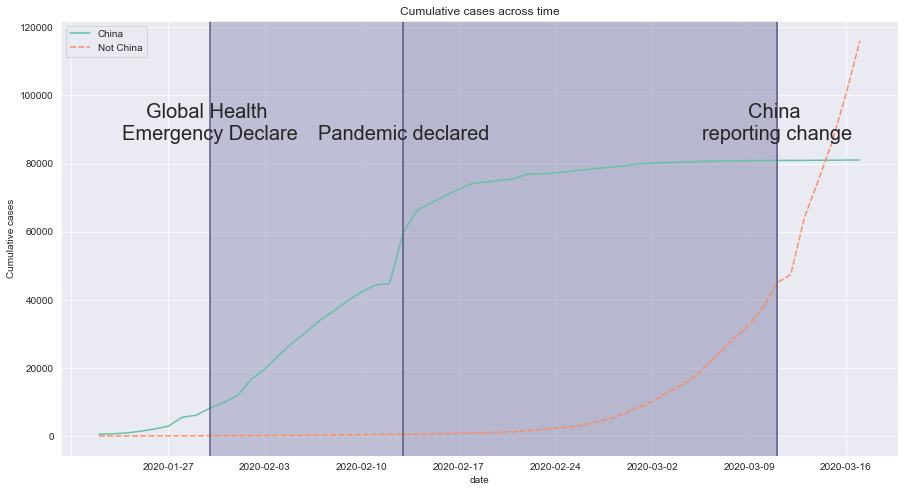

In [7]:
# Graph settings 
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize = (15, 8))

# plot's title and (x,y) label
plt.title("Cumulative cases across time")
plt.xlabel("Date")
plt.ylabel("Cumulative cases")

# Determine if plot is multiple line or single line
ax = sns.lineplot(data=china_vs_world)
# Space out x-axis (prevent messy x-axis)
ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=1))

# Annotate event 
height_text = china_vs_world["Not China"].max()*(3/4)
p1 = plt.axvline(x="2020-01-30",color='#5c5c8a')
ax.text("2020-01-30", height_text ,"Global Health \nEmergency Declare", fontsize=20, horizontalalignment='center')
p2 = plt.axvline(x="2020-02-13",color='#5c5c8a')
ax.text("2020-02-13", height_text ,"Pandemic declared", fontsize=20, horizontalalignment='center')
p3 = plt.axvline(x="2020-03-11",color='#5c5c8a')
ax.text("2020-03-11", height_text ,"China \nreporting change", fontsize=20, horizontalalignment='center')

# highlight period 
ax.axvspan("2020-02-13", "2020-01-30", color='#9494b8', alpha=0.5)
ax.axvspan("2020-03-11", "2020-02-13", color='#8585ad', alpha=0.5)
plt.show()


# Show trend line in China
<p>
To visualize and predict the grow rate of COVID-19 cases in China, is to find out if the cases are <em> growing faster or slower than linearly </em> <br> Around February 13, 2020, it shows significant spike of cases. However, after a few days, the growth pace slows down. Here's a visualization of the growth after February 15, 2020?</p>

In [8]:
# Filter for COVID-19 Cases in China and after Feb 15th
china_trend = confirmed_cases_china_vs_world.loc[
                (confirmed_cases_china_vs_world['is_china']=="China") 
                & (confirmed_cases_china_vs_world["date"] >= "2020-02-15")]

In [9]:
# Change the date in `china_trend` into pandas datetime
china_trend["date"] = china_trend["date"].map(pd.to_datetime)
china_trend.head()

<ipython-input-9-c8f9a9bb825d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_trend["date"] = china_trend["date"].map(pd.to_datetime)


,is_china,date,cases,cum_cases
24,China,2020-02-15,2055,68413
25,China,2020-02-16,2100,70513
26,China,2020-02-17,1921,72434
27,China,2020-02-18,1777,74211
28,China,2020-02-19,408,74619


In [10]:
# SettingWithCopyWarning occurs as the code above copies a slice from the original dataframe
# However, this is wanted to replace the orginial dataframe with upadated "dates", so the warning 
# will be left as it is
pd.options.mode.chained_assignment = 'warn'

# Linear Regression function:
- Function for plotting linear regression line 
- Reduce redundent code

In [11]:
def plot_lr(dataframe, title, x, y):
    """
    Plots linear trend of given dataset 
    :param title_name: title name of plot 
    :param dataframe: data to plot 
    :param x: x-axis of plot
    :param y: y-axis of plot
    """
    # Define the slope, intercept, r_value, p_value, std_err of trend line:
    slope, intercept, r_value, p_value, std_err = linregress(dataframe[x].apply(lambda date: date.toordinal()), 
                                                    dataframe[y])

    # Trend line calculation
    line = [slope*xi + intercept for xi in dataframe[x].apply(lambda date: date.toordinal())]

    # Plot setting
    plt.figure(figsize = (15, 8))       
    plt.title(title, size = 15)

    # Trend line plot
    plt.plot(dataframe[x], line, color='#ff6666', linewidth=3, label="Linear trend")
    ax = sns.lineplot(data=dataframe, x=dataframe[x], y=dataframe[y], 
            label = 'Cummulative COVID-19 Cases')
    ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=1))
    plt.ylabel("Cummulative COVID-19 Cases", size = 15)
    plt.xlabel("Date", size = 15)

    plt.show() 

## The linear trend for COVID-19 cases in <b>China</b>:   
Using linear regression to demostrate the trend

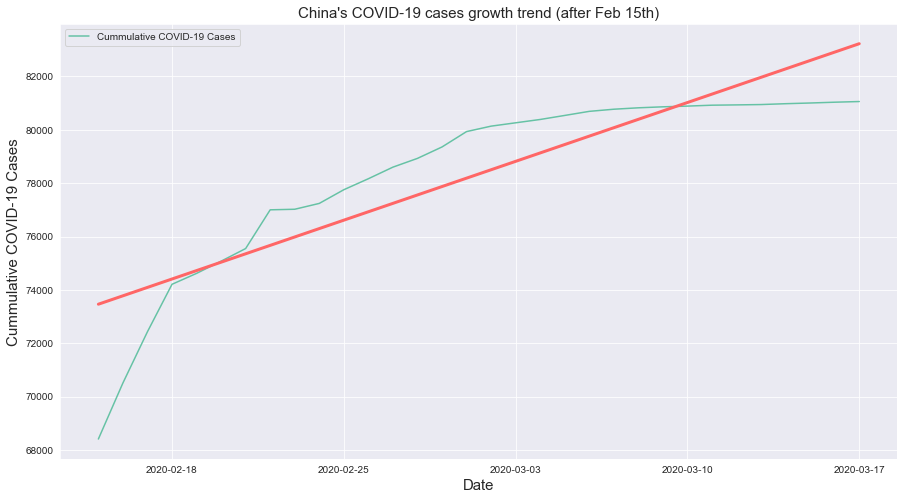

In [12]:
plot_lr(china_trend, "China's COVID-19 cases growth trend (after Feb 15th)", "date", "cum_cases")

## Rest of the World
<p>According to the graph above, China's <b>growth rate is less than linear</b>. That's brilliant news because it means China had the virus under control in late February and early March.</p>
<p>Now, let's visualize the linear growth in the <b>rest of the world</b></p>

In [13]:
# Filter for COVID-19 Cases in the rest of the world (not in China)
world_trend = confirmed_cases_china_vs_world.loc[
                (confirmed_cases_china_vs_world['is_china']=="Not China")]

In [14]:
# Change the date in `world_trend` into pandas datetime
world_trend.date = pd.to_datetime(world_trend.date)
world_trend.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,is_china,date,cases,cum_cases
56,Not China,2020-01-22,7,7
57,Not China,2020-01-23,3,10
58,Not China,2020-01-24,11,21
59,Not China,2020-01-25,7,28
60,Not China,2020-01-26,15,43


## The linear trend for COVID-19 cases in <b>the rest of the world</b>:   
Using linear regression to demostrate the trend

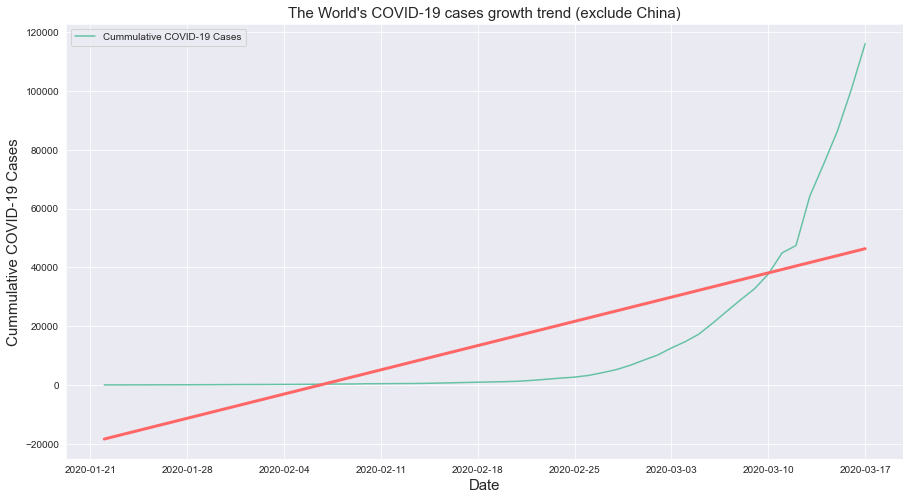

In [15]:
plot_lr(world_trend, "The World's COVID-19 cases growth trend (exclude China)", "date", "cum_cases")

 ### As plotted from above, it seems as if the cases in the rest of the world is increasing faster than the linear trend. 
 Hence, the straight line does not fit well to the plot.

# Transfrom the World cases to another model
> - Using logarithmic scale (in y-axis) to view in another perspective

In [16]:
world_trend_log10 = world_trend[["date", "cum_cases"]]
world_trend_log10["cum_cases_log10"] = world_trend_log10["cum_cases"].map(np.log10)
world_trend_log10.head()

<ipython-input-16-4ffafbba31cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_trend_log10["cum_cases_log10"] = world_trend_log10["cum_cases"].map(np.log10)


,date,cum_cases,cum_cases_log10
56,2020-01-22,7,0.845098
57,2020-01-23,10,1.000000
58,2020-01-24,21,1.322219
59,2020-01-25,28,1.447158
60,2020-01-26,43,1.633468


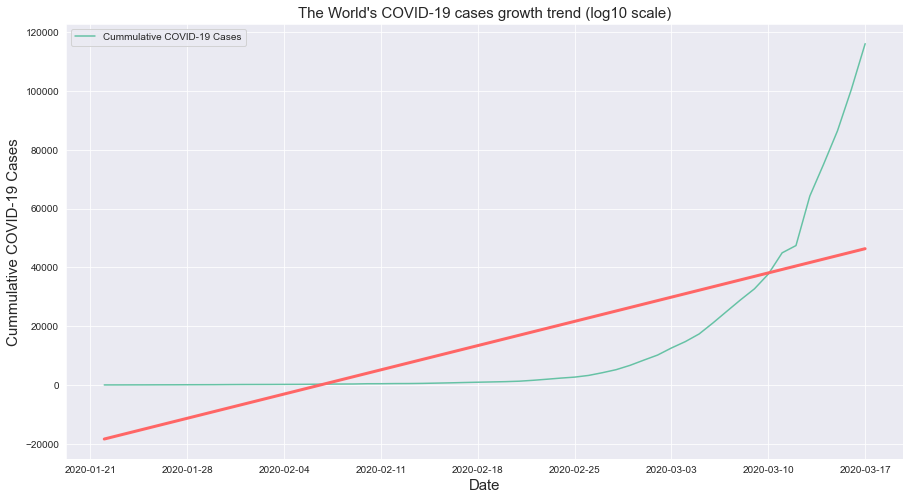

In [17]:
plot_lr(world_trend_log10, "The World's COVID-19 cases growth trend (log10 scale)", "date", "cum_cases")

# Visualize each country's status 
<p>
According to the plot above, using the logarithmic scale helps the linear regression <b>fits well</b> to the data. <br> This is terrific for a data science perspective, but terrible for the public health as it shows the cases of COVID-19 are growing exponentially. </p>
<p>However, this is not the case to all countries, because the affect of COVID-19 is not the same globally. A visualization for each country's cases will help clarify how the world is handling COVID-19.</p>

In [18]:
# Confirm cases from each country
confirm_cases_country = pd.read_csv("datasets/confirmed_cases_by_country.csv")
each_country_cases = confirm_cases_country.groupby("country").sum()
each_country_cases.reset_index(inplace=True)
each_country_cases.describe()

,cases,cum_cases
count,151.000000,1.510000e+02
mean,768.794702,1.604091e+04
std,3249.953846,1.115492e+05
min,1.000000,1.000000e+00
25%,5.000000,1.350000e+01
50%,38.000000,1.540000e+02
75%,185.500000,9.865000e+02
max,31506.000000,1.313061e+06


## Too many countries
> - From the stats above, we can see there are over 151 countries available in this dataset
> - Instead of plotting every countries, the first 7  countries with the highest cummulative cases will be chosen 

In [19]:
each_country_cases = each_country_cases.nlargest(7, ["cum_cases"])
top_country = each_country_cases["country"]
top_country

143              US
48           France
69            Italy
65             Iran
76     Korea, South
128           Spain
51          Germany
Name: country, dtype: object

In [20]:
# Query out the top 7 countries
# Then group them by country & date with the cases as values
top_country_cases = confirm_cases_country.query("country in @top_country")
top_country_cases = top_country_cases.groupby(["country", "date"]).sum()
top_country_cases.reset_index(inplace=True)

# From the plots above, it was shown that other countries starts to accummulate cases around February
# Thus, the plot would be more significant if the date in the dataset starts from February
top_country_cases = top_country_cases.loc[(top_country_cases["date"] >= "2020-02-15")]
top_country_cc = top_country_cases.pivot(index="date", columns="country", values="cum_cases")
top_country_cc = top_country_cc.reindex(sorted(top_country_cc.columns, reverse=True), axis=1)
top_country_cc.head(10)

country,US,Spain,"Korea, South",Italy,Iran,Germany,France
date,,,,,,,
2020-02-15,741,2,28,3,0,16,96
2020-02-16,741,2,29,3,0,16,96
2020-02-17,741,2,30,3,0,16,96
2020-02-18,741,2,31,3,0,16,96
2020-02-19,741,2,31,3,2,16,96
2020-02-20,741,2,104,3,5,16,96
2020-02-21,847,2,204,20,18,16,96
2020-02-22,855,2,433,62,28,16,96
2020-02-23,855,2,602,155,43,16,96


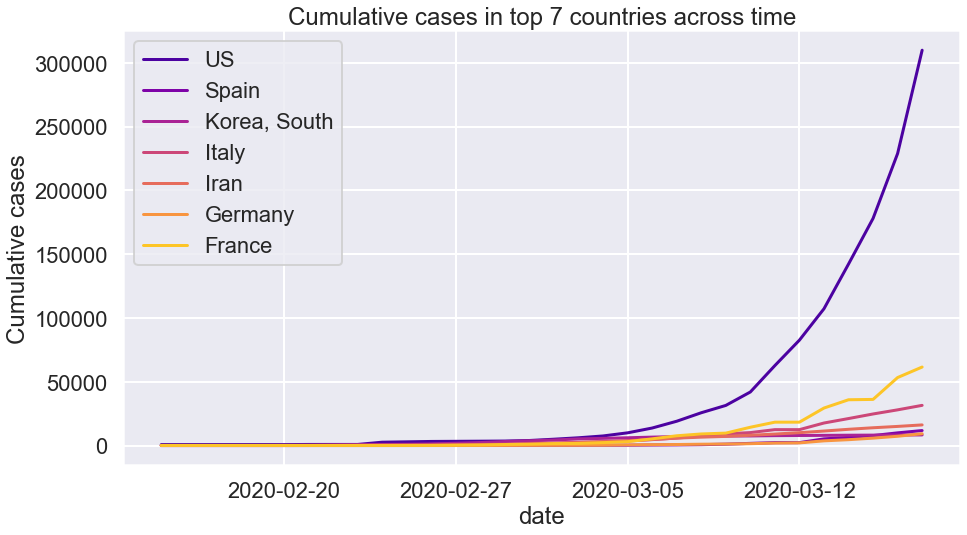

In [21]:
# Graph settings 
sns.set_context("poster")
plt.figure(figsize = (15, 8))

# plot's title and (x,y) label
plt.title("Cumulative cases in top 7 countries across time")
plt.xlabel("Date")
plt.ylabel("Cumulative cases")

# Determine if plot is multiple line or single line
ax = sns.lineplot(data=top_country_cc, dashes=False, palette="plasma")
# Space out x-axis (prevent messy x-axis)
ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=1))

plt.show()